<a href="https://colab.research.google.com/github/ayudhiarhm/EcoLive/blob/main/capstone_prediksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# CO2 Monthly Time Series

## Data Preparation

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Bangkit/Prediksi/CO2_2000_2021(2).xlsx', sheet_name='Sheet1')
df

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,2000,75.033577,77.599501,81.692956,79.657333,86.673927,78.173485,79.360300,79.175078,77.199767,79.514418,77.600070,79.307682
1,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,2001,77.059294,79.352561,83.946625,81.483107,88.966370,82.555282,83.105237,81.294777,77.966059,81.675761,79.002588,80.758753
2,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,2002,79.571167,80.777681,85.597256,83.685217,91.064551,83.701423,84.069834,82.720519,79.560301,82.789217,80.485608,82.489015
3,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,2003,102.868730,106.268702,114.549487,109.726618,121.908291,110.957630,109.637020,106.824427,97.563781,101.397025,101.197493,105.571883
4,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,2004,107.690365,110.753316,116.594683,111.111746,121.936352,110.681718,111.957543,110.971074,105.578674,110.857518,108.447994,112.058260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,CO2,2017,2253.730538,2245.699424,2479.682079,2581.629857,2747.581336,7806.590406,10441.629034,3263.216115,2486.678413,2588.775637,2410.167275,2297.788812
4616,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,CO2,2018,2453.421633,2439.473515,2693.030218,2798.897159,2974.919041,8127.953719,10813.515309,3505.286372,2701.580067,2807.629639,2612.459802,2497.723869
4617,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,CO2,2019,2393.657272,2367.394602,2537.242204,2594.299137,2831.725584,8105.360162,10845.436251,3439.962129,2545.627830,2602.863887,2468.583883,2414.406294
4618,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,CO2,2020,2391.721945,2378.872244,2626.665899,2729.983302,2908.968184,8143.848080,10871.811208,3450.562261,2634.845880,2738.338014,2547.593154,2434.758304


In [ ]:
indo = df[df['Name']=='Indonesia']
indo

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1958,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2000,44890.911468,45865.603408,52874.778650,55926.436749,51049.034024,47230.856151,45442.494070,45761.878081,53044.699805,58140.464991,53540.237894,47807.557879
1959,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2001,47029.067425,47721.130313,54457.600696,57383.971669,52648.781041,49077.061510,47124.834102,47613.463449,54203.493400,59463.791101,54920.242040,49291.099672
1960,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2002,48071.234615,48465.505163,55526.319630,58535.584493,53513.507200,50023.296979,48051.474954,48621.447903,55189.656164,60449.596523,55930.412601,50234.102120
1961,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2003,50322.256777,50845.426104,58157.812769,60827.202049,56031.820823,52461.658621,50456.983710,50807.534523,57156.807061,62625.966892,58185.759100,52875.790496
1962,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2004,51288.196575,51691.245785,58683.497123,61966.705972,56786.395881,53305.462193,51383.625296,51914.209665,58965.863786,64528.557685,59701.089381,54008.053151
1963,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2005,51216.219150,51848.938885,59381.579250,62664.118449,57395.085197,53676.871879,51546.305981,52053.961461,59201.943947,64715.553024,59925.125136,53988.230458
1964,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2006,53271.857432,54061.747469,61620.210142,64654.782761,59480.688380,56073.685934,54008.926605,54356.771608,61403.239390,67079.866866,62366.087318,56547.115999
1965,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2007,54696.338836,55264.250492,63233.608260,66163.542887,61254.279168,57537.035244,55413.174500,55732.024716,62821.425266,68641.378496,63860.082121,57747.629339
1966,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2008,55230.851545,56111.514467,63632.999720,66838.601863,61631.457993,57841.826732,55606.341029,56042.421111,62840.531616,69139.228129,63924.538677,57558.051631
1967,Non-Annex_I,Indonesia +,IDN,Indonesia,CO2,2009,55189.208026,55195.782076,63733.348812,66911.023654,61695.357302,57753.698678,55772.414968,56203.768160,63380.282614,70178.801735,64916.052240,58329.200222


In [ ]:
data_co2 = indo[['Year','Jan', 'Feb',	'Mar',	'Apr',	'May',	'Jun',	'Jul',	'Aug',	'Sep',	'Oct',	'Nov',	'Dec']]
data_co2 = data_co2.reset_index(drop=True)
data_co2 = data_co2.set_index('Year')
data_co2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2000,44890.911468,45865.603408,52874.778650,55926.436749,51049.034024,47230.856151,45442.494070,45761.878081,53044.699805,58140.464991,53540.237894,47807.557879
2001,47029.067425,47721.130313,54457.600696,57383.971669,52648.781041,49077.061510,47124.834102,47613.463449,54203.493400,59463.791101,54920.242040,49291.099672
2002,48071.234615,48465.505163,55526.319630,58535.584493,53513.507200,50023.296979,48051.474954,48621.447903,55189.656164,60449.596523,55930.412601,50234.102120
2003,50322.256777,50845.426104,58157.812769,60827.202049,56031.820823,52461.658621,50456.983710,50807.534523,57156.807061,62625.966892,58185.759100,52875.790496
2004,51288.196575,51691.245785,58683.497123,61966.705972,56786.395881,53305.462193,51383.625296,51914.209665,58965.863786,64528.557685,59701.089381,54008.053151
2005,51216.219150,51848.938885,59381.579250,62664.118449,57395.085197,53676.871879,51546.305981,52053.961461,59201.943947,64715.553024,59925.125136,53988.230458
2006,53271.857432,54061.747469,61620.210142,64654.782761,59480.688380,56073.685934,54008.926605,54356.771608,61403.239390,67079.866866,62366.087318,56547.115999
2007,54696.338836,55264.250492,63233.608260,66163.542887,61254.279168,57537.035244,55413.174500,55732.024716,62821.425266,68641.378496,63860.082121,57747.629339
2008,55230.851545,56111.514467,63632.999720,66838.601863,61631.457993,57841.826732,55606.341029,56042.421111,62840.531616,69139.228129,63924.538677,57558.051631


In [ ]:
data_co2.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,57893.052389,57830.824658,65467.709728,68188.303930,63178.462944,59569.221831,57645.906905,58093.586798,64947.160439,71146.204842,65990.456927,59809.276088
std,7716.709541,7042.677403,7038.173409,6600.317855,6625.133866,6728.124939,6885.190984,6856.662511,6730.027058,7385.971472,6984.074167,6620.738918
min,44890.911468,45865.603408,52874.778650,55926.436749,51049.034024,47230.856151,45442.494070,45761.878081,53044.699805,58140.464991,53540.237894,47807.557879
25%,51784.111789,52402.141031,59941.236973,63161.784527,57916.485992,54276.075393,52161.961137,52629.663998,59752.267808,65306.631485,60535.365681,54642.818863
50%,57608.873614,57114.389591,65812.754048,69169.273239,64176.593338,60372.216852,57921.145924,58283.952221,65512.124017,71691.815506,66302.253411,59914.971397
75%,61801.257617,61415.918590,70109.153946,72466.086808,67623.645862,63787.107925,61986.014493,62340.933815,69459.966541,76006.813149,70549.345894,64027.951478
max,72610.561294,71370.671579,78155.394432,79546.125857,74850.913432,71876.068874,70476.010232,70605.484481,76656.349851,83961.466181,78480.613019,71971.897012


In [ ]:
data_2000 = data_co2[data_co2.index==2000]
data_2001 = data_co2[data_co2.index==2001]
data_2002 = data_co2[data_co2.index==2002]
data_2003 = data_co2[data_co2.index==2003]
data_2004 = data_co2[data_co2.index==2004]
data_2005 = data_co2[data_co2.index==2005]
data_2006 = data_co2[data_co2.index==2006]
data_2007 = data_co2[data_co2.index==2007]
data_2008 = data_co2[data_co2.index==2008]
data_2009 = data_co2[data_co2.index==2009]
data_2010 = data_co2[data_co2.index==2010]
data_2011 = data_co2[data_co2.index==2011]
data_2012 = data_co2[data_co2.index==2012]
data_2013 = data_co2[data_co2.index==2013]
data_2014 = data_co2[data_co2.index==2014]
data_2015 = data_co2[data_co2.index==2015]
data_2016 = data_co2[data_co2.index==2016]
data_2017 = data_co2[data_co2.index==2017]
data_2018 = data_co2[data_co2.index==2018]
data_2019 = data_co2[data_co2.index==2019]
data_2020 = data_co2[data_co2.index==2020]
data_2021 = data_co2[data_co2.index==2021]

In [ ]:
data_2020

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2020,67502.19527,66413.970965,73370.834476,74890.331451,70206.548353,67213.740304,65804.411756,66005.92522,72096.324314,79190.954733,73704.185718,67231.416878


In [ ]:
data_2000 = data_2000.melt()
data_2001 = data_2001.melt()
data_2002 = data_2002.melt()
data_2003 = data_2003.melt()
data_2004 = data_2004.melt()
data_2005 = data_2005.melt()
data_2006 = data_2006.melt()
data_2007 = data_2007.melt()
data_2008 = data_2008.melt()
data_2009 = data_2009.melt()
data_2010 = data_2010.melt()
data_2011 = data_2011.melt()
data_2012 = data_2012.melt()
data_2013 = data_2013.melt()
data_2014 = data_2014.melt()
data_2015 = data_2015.melt()
data_2016 = data_2016.melt()
data_2017 = data_2017.melt()
data_2018 = data_2018.melt()
data_2019 = data_2019.melt()
data_2020 = data_2020.melt()
data_2021 = data_2021.melt()

In [ ]:
data_2000

,variable,value
0,Jan,44890.911468
1,Feb,45865.603408
2,Mar,52874.778650
3,Apr,55926.436749
4,May,51049.034024
5,Jun,47230.856151
6,Jul,45442.494070
7,Aug,45761.878081
8,Sep,53044.699805
9,Oct,58140.464991


In [ ]:
data_2001

,variable,value
0,Jan,47029.067425
1,Feb,47721.130313
2,Mar,54457.600696
3,Apr,57383.971669
4,May,52648.781041
5,Jun,49077.061510
6,Jul,47124.834102
7,Aug,47613.463449
8,Sep,54203.493400
9,Oct,59463.791101


In [ ]:
month = ['Jan', 'Feb',	'Mar',	'Apr',	'May',	'Jun',	'Jul',	'Aug',	'Sep',	'Oct',	'Nov',	'Dec']

<function matplotlib.pyplot.show(close=None, block=None)>

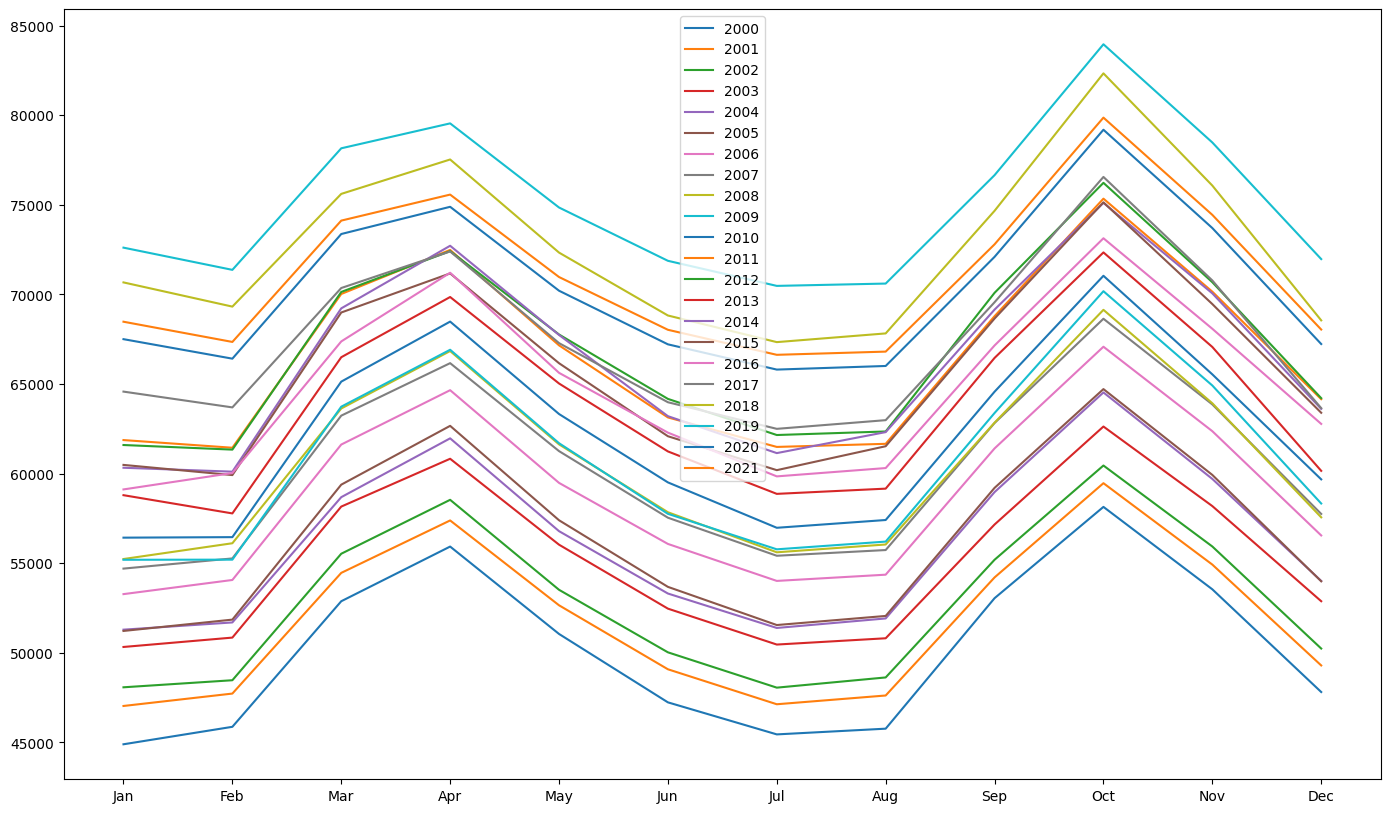

In [ ]:
# Buat plot per bulan
plt.figure(figsize = (17,10))
plt.plot(month,data_2000['value'],label='2000')
plt.plot(month,data_2001['value'],label='2001')
plt.plot(month,data_2002['value'],label='2002')
plt.plot(month,data_2003['value'],label='2003')
plt.plot(month,data_2004['value'],label='2004')
plt.plot(month,data_2005['value'],label='2005')
plt.plot(month,data_2006['value'],label='2006')
plt.plot(month,data_2007['value'],label='2007')
plt.plot(month,data_2008['value'],label='2008')
plt.plot(month,data_2009['value'],label='2009')
plt.plot(month,data_2010['value'],label='2010')
plt.plot(month,data_2011['value'],label='2011')
plt.plot(month,data_2012['value'],label='2012')
plt.plot(month,data_2013['value'],label='2013')
plt.plot(month,data_2014['value'],label='2014')
plt.plot(month,data_2015['value'],label='2015')
plt.plot(month,data_2016['value'],label='2016')
plt.plot(month,data_2017['value'],label='2017')
plt.plot(month,data_2018['value'],label='2018')
plt.plot(month,data_2019['value'],label='2019')
plt.plot(month,data_2020['value'],label='2020')
plt.plot(month,data_2021['value'],label='2021')
plt.legend()
plt.show

In [ ]:
# Gabung data
data_monthly = pd.concat([data_2000,data_2001,data_2002,data_2003,data_2004,data_2005,data_2006,data_2007,data_2008,data_2009,data_2010,
                          data_2011,data_2012,data_2013,data_2014,data_2015,data_2016,data_2017,data_2018,data_2019,data_2020,data_2021], ignore_index=False)
data_monthly = data_monthly.reset_index()
data_monthly = data_monthly.drop('index', axis=1)
data_monthly = data_monthly.rename(columns={'variable': 'Bulan', 'value': 'Kadar CO2'})
data_monthly

,Bulan,Kadar CO2
0,Jan,44890.911468
1,Feb,45865.603408
2,Mar,52874.778650
3,Apr,55926.436749
4,May,51049.034024
...,...,...
259,Aug,66807.528597
260,Sep,72795.185824
261,Oct,79867.809114
262,Nov,74440.059801


In [ ]:
# Buat kolom bulan ke
bulan_ke =[]
a = 1
for i in range(len(data_monthly)):
  bulan_ke.append(a)
  if a==12:
    a=0
  a+=1
data_monthly['Bulan ke-'] = bulan_ke
data_monthly

,Bulan,Kadar CO2,Bulan ke-
0,Jan,44890.911468,1
1,Feb,45865.603408,2
2,Mar,52874.778650,3
3,Apr,55926.436749,4
4,May,51049.034024,5
...,...,...,...
259,Aug,66807.528597,8
260,Sep,72795.185824,9
261,Oct,79867.809114,10
262,Nov,74440.059801,11


In [ ]:
# Buat kolom year
year =[]
tahun = 2000
n = 1
for i in range(len(data_monthly)):
  year.append(tahun)
  if i+1==n*12:
    n+=1
    tahun+=1
data_monthly['Tahun'] = year
data_monthly

,Bulan,Kadar CO2,Bulan ke-,Tahun
0,Jan,44890.911468,1,2000
1,Feb,45865.603408,2,2000
2,Mar,52874.778650,3,2000
3,Apr,55926.436749,4,2000
4,May,51049.034024,5,2000
...,...,...,...,...
259,Aug,66807.528597,8,2021
260,Sep,72795.185824,9,2021
261,Oct,79867.809114,10,2021
262,Nov,74440.059801,11,2021


In [ ]:
data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bulan      264 non-null    object 
 1   Kadar CO2  264 non-null    float64
 2   Bulan ke-  264 non-null    int64  
 3   Tahun      264 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 8.4+ KB


In [ ]:
# Normalisasi
#Menambahkan kolom normalized close
data_monthly['Normalized CO2'] =''
data_monthly['Data Nol'] =''
mean = np.mean(data_monthly[:len(data_monthly['Tahun']<2020)]['Kadar CO2'])
std = np.std(data_monthly[:len(data_monthly['Tahun']<2020)]['Kadar CO2'])

#Mengelompokkan data per tahun
groups = data_monthly.groupby(data_monthly['Tahun'])
for year, group in groups:
  group['Normalized CO2'] = (group['Kadar CO2']-mean) / std
  data_monthly.update(group)

#Menormalisasi data pertama tiap tahunnya menjadi nol
for year, group in groups:
  group['Data Nol'] = group['Normalized CO2'] - group.iloc[0]['Normalized CO2']
  data_monthly.update(group)
print(data_monthly)

    Bulan     Kadar CO2  Bulan ke-   Tahun Normalized CO2  Data Nol
0     Jan  44890.911468        1.0  2000.0      -2.170034       0.0
1     Feb  45865.603408        2.0  2000.0      -2.049782  0.120251
2     Mar  52874.778650        3.0  2000.0      -1.185034     0.985
3     Apr  55926.436749        4.0  2000.0      -0.808539  1.361494
4     May  51049.034024        5.0  2000.0      -1.410283  0.759751
..    ...           ...        ...     ...            ...       ...
259   Aug  66807.528597        8.0  2021.0       0.533902 -0.205832
260   Sep  72795.185824        9.0  2021.0       1.272622  0.532888
261   Oct  79867.809114       10.0  2021.0       2.145198  1.405464
262   Nov  74440.059801       11.0  2021.0       1.475556  0.735822
263   Dec  68039.285552       12.0  2021.0       0.685868 -0.053866

[264 rows x 6 columns]


In [ ]:
group

,Bulan,Kadar CO2,Bulan ke-,Tahun,Normalized CO2,Data Nol
252,Jan,68475.889915,1.0,2021.0,0.739734,0.0
253,Feb,67347.610472,2.0,2021.0,0.600534,-0.1392
254,Mar,74119.387896,3.0,2021.0,1.435993,0.69626
255,Apr,75571.413435,4.0,2021.0,1.615135,0.875401
256,May,70970.608971,5.0,2021.0,1.047517,0.307783
257,Jun,68025.569044,6.0,2021.0,0.684176,-0.055558
258,Jul,66628.793264,7.0,2021.0,0.511851,-0.227883
259,Aug,66807.528597,8.0,2021.0,0.533902,-0.205832
260,Sep,72795.185824,9.0,2021.0,1.272622,0.532888
261,Oct,79867.809114,10.0,2021.0,2.145198,1.405464


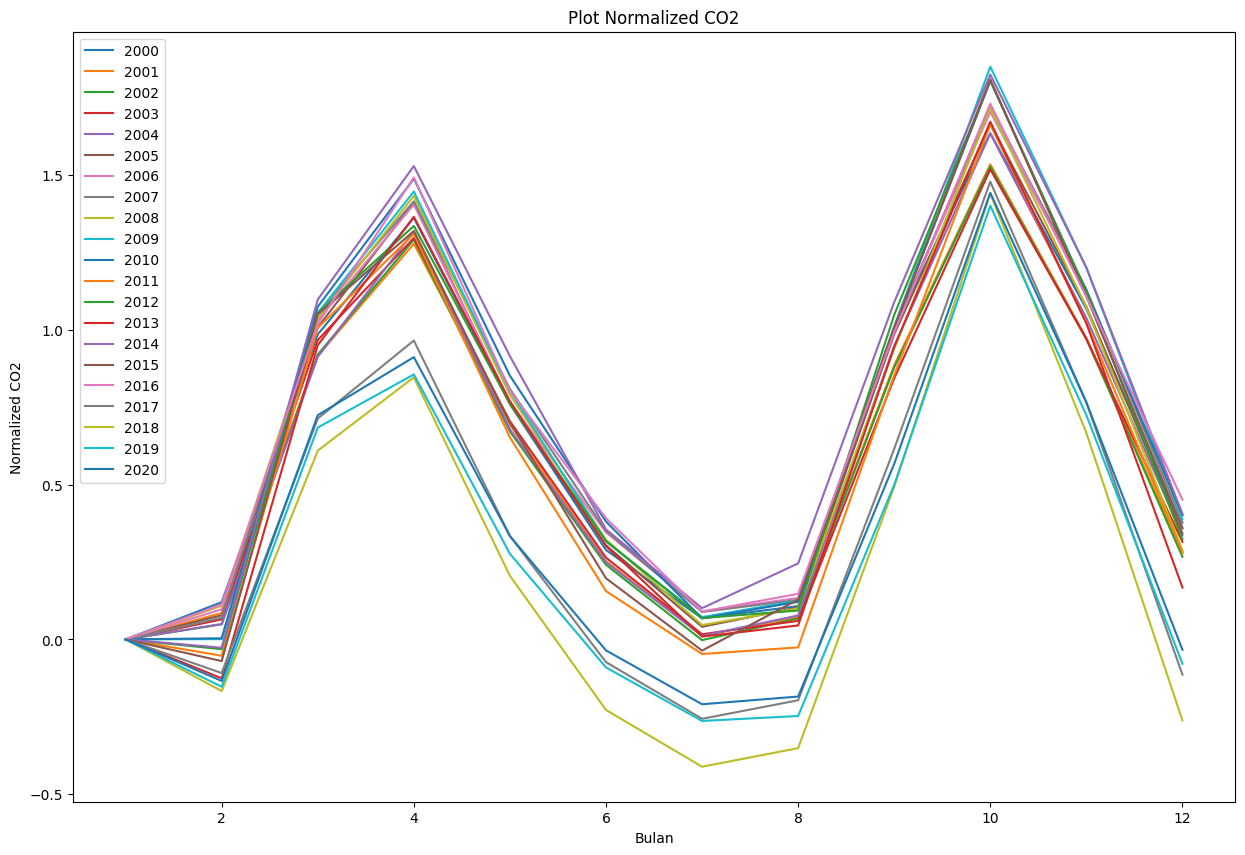

In [ ]:
#Menampilkan plot normalized co2
fig, ax = plt.subplots()

for year in range (2000,2021,1):
  year_data = data_monthly[data_monthly['Tahun']==year]
  ax.plot(year_data['Bulan ke-'], year_data['Data Nol'], label=year)
ax.set_xlabel('Bulan')
ax.set_ylabel('Normalized CO2')
fig.set_figwidth(15)
fig.set_figheight(10)
ax.legend()
plt.title("Plot Normalized CO2")
plt.show()

# Coba2

In [ ]:
#Menentukan variabel
X = data_monthly[['Bulan ke-','Tahun']]
Y = data_monthly['Data Nol']
#Menentukan variabel train
xtrain = X[:len(X[X['Tahun']<2021])]
ytrain = Y[:len(X[X['Tahun']<2021])]
xtest = X[len(X[X['Tahun']<2021]):]
ytest = Y[len(X[X['Tahun']<2021]):]

In [ ]:
# Fitting Model
# Define Kernel dan Model
kernel = 1.0 * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# gpr = GaussianProcessRegressor()
gpr.fit(xtrain, ytrain)

pred, standar = gpr.predict(xtest, return_std = True)

In [ ]:
df_conf_int_2 = pd.DataFrame()
df_conf_int_2['Lower'] = pred - 1.96 * standar
df_conf_int_2['Upper'] = pred + 1.96 * standar
df_conf_int_2.index = xtest['Bulan ke-']

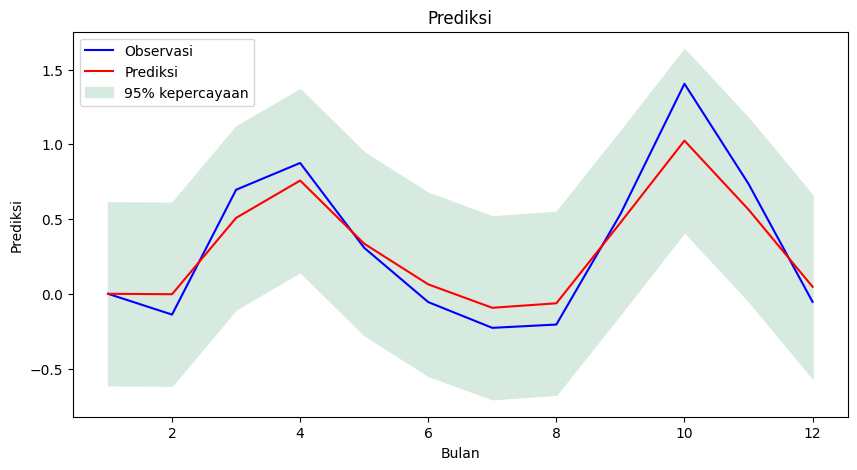

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(xtest['Bulan ke-'],ytest, label = 'Observasi', color = 'blue')
plt.plot(xtest['Bulan ke-'],pred, label = 'Prediksi', color = 'red')

plt.fill_between(
    df_conf_int_2.index,
    df_conf_int_2['Lower'],
    df_conf_int_2['Upper'],
    label=r"95% kepercayaan", color = '#d6eadf')
plt.xlabel('Bulan')
plt.ylabel('Prediksi')
plt.title('Prediksi')
plt.legend()
plt.show()

In [ ]:
pred

array([ 1.03500748e-08, -2.98025778e-03,  5.07889674e-01,  7.57736704e-01,
        3.35195054e-01,  6.29775338e-02, -9.37222727e-02, -6.35466165e-02,
        4.75348261e-01,  1.02475100e+00,  5.63785024e-01,  4.72173373e-02])

<ipython-input-27-f730608cd8b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Prediksi']=inv_normalisasi(pred,np.array(data_test['Normalized CO2']), mean,std)


    Bulan     Kadar CO2  Bulan ke-   Tahun Normalized CO2  Data Nol  \
252   Jan  68475.889915        1.0  2021.0       0.739734       0.0   
253   Feb  67347.610472        2.0  2021.0       0.600534   -0.1392   
254   Mar  74119.387896        3.0  2021.0       1.435993   0.69626   
255   Apr  75571.413435        4.0  2021.0       1.615135  0.875401   
256   May  70970.608971        5.0  2021.0       1.047517  0.307783   
257   Jun  68025.569044        6.0  2021.0       0.684176 -0.055558   
258   Jul  66628.793264        7.0  2021.0       0.511851 -0.227883   
259   Aug  66807.528597        8.0  2021.0       0.533902 -0.205832   
260   Sep  72795.185824        9.0  2021.0       1.272622  0.532888   
261   Oct  79867.809114       10.0  2021.0       2.145198  1.405464   
262   Nov  74440.059801       11.0  2021.0       1.475556  0.735822   
263   Dec  68039.285552       12.0  2021.0       0.685868 -0.053866   

         Prediksi  
252  68475.889999  
253  68451.733581  
254  72592.56492

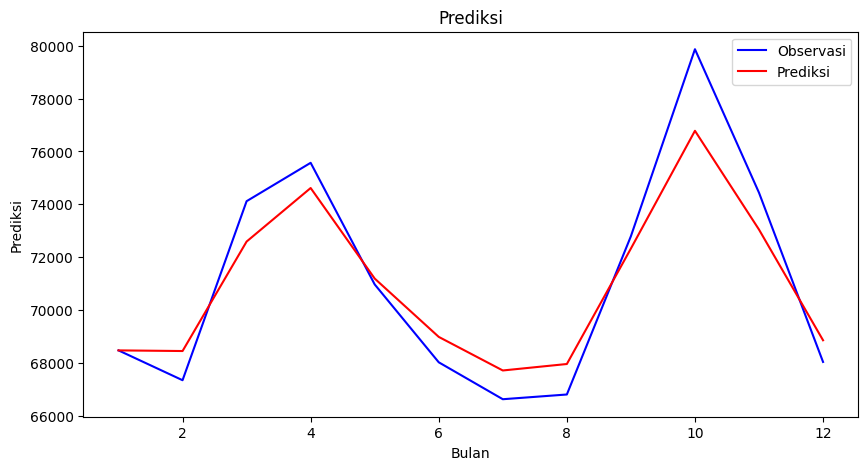

In [ ]:
# invers normalisasi
data_test = data_monthly[data_monthly['Tahun']>2020]
data_test
def inv_normalisasi(data, a, mean, std):
  data_1 = [(data[i]+a[0]) for i in range(0,len(data))]
  data_2 = [(data_1[i]*std + mean)for i in range(0,len(data))]
  return data_2
data_test['Prediksi']=inv_normalisasi(pred,np.array(data_test['Normalized CO2']), mean,std)
print(data_test)

plt.figure(figsize = (10,5))
plt.plot(data_test['Bulan ke-'],data_test['Kadar CO2'], label = 'Observasi', color = 'blue')
plt.plot(data_test['Bulan ke-'],data_test['Prediksi'], label = 'Prediksi', color = 'red')
plt.xlabel('Bulan')
plt.ylabel('Prediksi')
plt.title('Prediksi')
plt.legend()
plt.show()

# Coba2 Pt 2

In [ ]:
#Menentukan variabel
X = data_monthly[['Bulan ke-','Tahun']]
Y = data_monthly['Kadar CO2']
#Menentukan variabel train
xtrain = X[:len(X[X['Tahun']<2021])]
ytrain = Y[:len(X[X['Tahun']<2021])]
xtest = X[len(X[X['Tahun']<2021]):]
ytest = Y[len(X[X['Tahun']<2021]):]

In [ ]:
# Fitting Model
# Define Kernel dan Model
kernel = 1.0 * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# gpr = GaussianProcessRegressor()
gpr.fit(xtrain, ytrain)

pred, standar = gpr.predict(xtest, return_std = True)

In [ ]:
pred

array([35033.45406944, 34707.9296564 , 38396.45894058, 39730.36210506,
       36930.07911363, 35111.75721575, 34173.49590763, 34367.34569293,
       37992.4928447 , 41875.26191707, 38691.05113721, 35033.09258868])

In [ ]:
ytest

252    68475.889915
253    67347.610472
254    74119.387896
255    75571.413435
256    70970.608971
257    68025.569044
258    66628.793264
259    66807.528597
260    72795.185824
261    79867.809114
262    74440.059801
263    68039.285552
Name: Kadar CO2, dtype: float64

In [ ]:
df_conf_int_2 = pd.DataFrame()
df_conf_int_2['Lower'] = pred - 1.96 * standar
df_conf_int_2['Upper'] = pred + 1.96 * standar
df_conf_int_2.index = xtest['Bulan ke-']

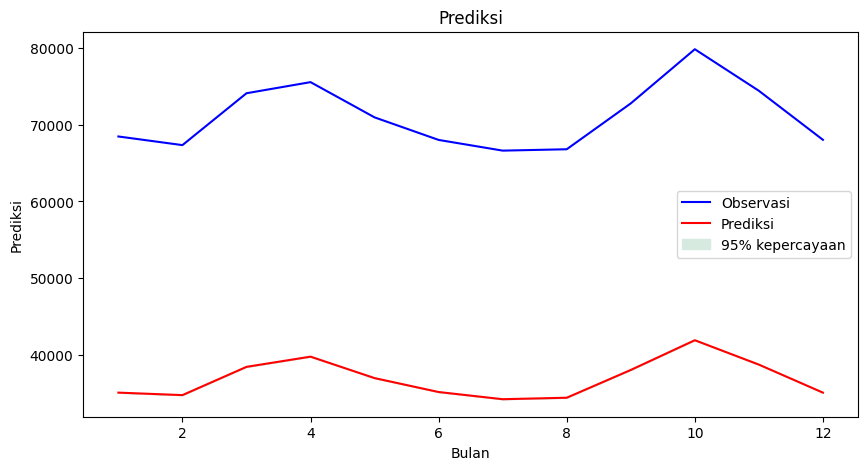

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(xtest['Bulan ke-'],ytest, label = 'Observasi', color = 'blue')
plt.plot(xtest['Bulan ke-'],pred, label = 'Prediksi', color = 'red')

plt.fill_between(
    df_conf_int_2.index,
    df_conf_int_2['Lower'],
    df_conf_int_2['Upper'],
    label=r"95% kepercayaan", color = '#d6eadf')
plt.xlabel('Bulan')
plt.ylabel('Prediksi')
plt.title('Prediksi')
plt.legend()
plt.show()

# Coba pt5

In [ ]:
array_bulan = [1,2,3,4,5,6,7,8,9,10,11,12]
tahun = []
for i in range(len(array_bulan)):
  tahun.append(2022)
print(array_bulan,tahun)

# Dataframe prediksi
prediksi = pd.DataFrame({'Bulan ke-': array_bulan, 'Tahun': tahun})
# data_prediksi = pd.concat([data_monthly,prediksi], ignore_index=False)
# print(data_prediksi)

#Menentukan variabel
X = data_monthly[['Bulan ke-','Tahun']]
Y = data_monthly['Normalized CO2']
#Menentukan variabel train
xtrain = X
ytrain = Y
xtest = prediksi
print(xtrain,ytrain)
print(xtest)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022]
     Bulan ke-   Tahun
0          1.0  2000.0
1          2.0  2000.0
2          3.0  2000.0
3          4.0  2000.0
4          5.0  2000.0
..         ...     ...
259        8.0  2021.0
260        9.0  2021.0
261       10.0  2021.0
262       11.0  2021.0
263       12.0  2021.0

[264 rows x 2 columns] 0     -2.170034
1     -2.049782
2     -1.185034
3     -0.808539
4     -1.410283
         ...   
259    0.533902
260    1.272622
261    2.145198
262    1.475556
263    0.685868
Name: Normalized CO2, Length: 264, dtype: object
    Bulan ke-  Tahun
0           1   2022
1           2   2022
2           3   2022
3           4   2022
4           5   2022
5           6   2022
6           7   2022
7           8   2022
8           9   2022
9          10   2022
10         11   2022
11         12   2022


In [ ]:
# Fitting Model
# Define Kernel dan Model
kernel = 1.0 * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# gpr = GaussianProcessRegressor()
gpr.fit(xtrain, ytrain)

pred, standar = gpr.predict(xtest, return_std = True)

In [ ]:
pred

array([0.92100319, 0.75281238, 1.32606789, 1.32889334, 1.0022296 ,
       0.79437274, 0.71967625, 0.72030181, 1.1548153 , 1.74396285,
       1.32613348, 0.81007395])

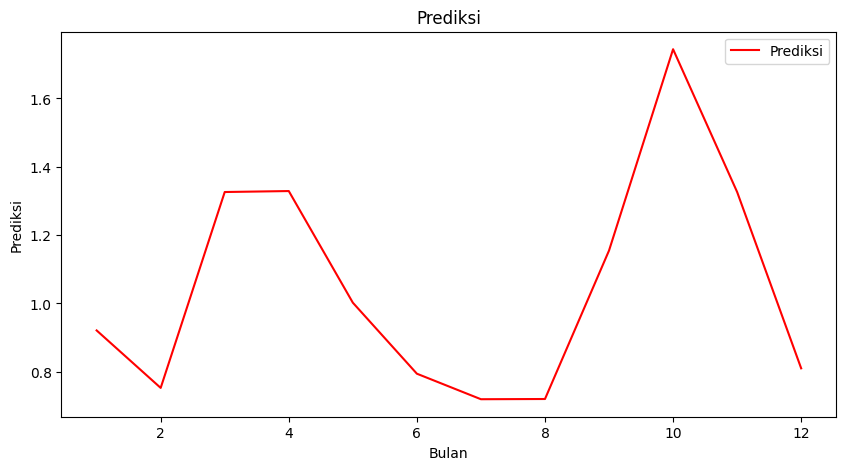

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(xtest['Bulan ke-'],pred, label = 'Prediksi', color = 'red')

# plt.fill_between(
#     df_conf_int_2.index,
#     df_conf_int_2['Lower'],
#     df_conf_int_2['Upper'],
#     label=r"95% kepercayaan", color = '#d6eadf')
plt.xlabel('Bulan')
plt.ylabel('Prediksi')
plt.title('Prediksi')
plt.legend()
plt.show()

In [ ]:
mean = np.mean(Y)
std = np.std(Y)
print(mean,std)

8.852346465287707e-16 1.0


In [ ]:
def inv_normalisasi(data, mean, std):
  data_2 = [(data[i]*std + mean)for i in range(0,len(data))]
  return data_2
data_2022=inv_normalisasi(pred, mean,std)
print(data_2022)

[0.9210031885946761, 0.7528123841359133, 1.3260678872434002, 1.3288933447709224, 1.0022296015539507, 0.7943727432555705, 0.7196762457004321, 0.720301805631925, 1.1548152957449616, 1.7439628466663495, 1.3261334791313901, 0.8100739490278294]


# Coba pt4

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Prepare your historical CO2 rate data
# Assuming you have CO2 rate data in the form of a numpy array called 'co2_data'

# Step 2: Feature Engineering (if required)
# You can extract additional features or perform any necessary preprocessing here

# Step 3: Data Split
train_size = int(len(data_monthly) * 0.8)
train_data = data_monthly[:len(data_monthly[data_monthly['Tahun']<2020])]
test_data = data_monthly[len(data_monthly[data_monthly['Tahun']<2020]):]

# Step 4: Model Building
model = Sequential()
model.add(LSTM(128, input_shape=(None, 1)))  # Adjust the LSTM units as needed
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 5: Model Training
history = model.fit(train_data[:-1], train_data[1:], epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Step 6: Model Evaluation
train_loss = model.evaluate(train_data[:-1], train_data[1:])
test_loss = model.evaluate(test_data[:-1], test_data[1:])
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Step 7: Feature Scaling (if required)

# Step 8: Predicting the Next 3 Months
last_three_months = test_data[-3:]  # Use the last three months as input for prediction
next_three_months = model.predict(last_three_months.reshape(1, -1, 1))

print("Predicted CO2 Rates for the Next 3 Months:")
print(next_three_months)

ValueError: ignored